Nạp dữ liệu thử nghiệm: iris (dataset về hoa)

In [7]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()

Hiển thị 10 dòng cuối (Dictionary-like object)

In [24]:
iris.data[-10:]

array([[6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

Tất cả các nhãn (cluster labels)

In [30]:
iris.target[-10:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Ý nghĩa của các nhãn

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Ý nghĩa của các đặc trưng (the meaning of the features)

In [31]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Giảm số chiều dữ liệu (do the dimension reduction)

In [33]:
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

Hiển thị 10 dòng cuối dữ liệu đã giảm số chiều xuống còn 2

In [38]:
pca_2d[-10:]

array([[ 2.31430339,  0.18260885],
       [ 1.92245088,  0.40927118],
       [ 1.41407223, -0.57492506],
       [ 2.56332271,  0.2759745 ],
       [ 2.41939122,  0.30350394],
       [ 1.94401705,  0.18741522],
       [ 1.52566363, -0.37502085],
       [ 1.76404594,  0.07851919],
       [ 1.90162908,  0.11587675],
       [ 1.38966613, -0.28288671]])

Trực quan hóa các cụm iris đã biết (tên cụm)

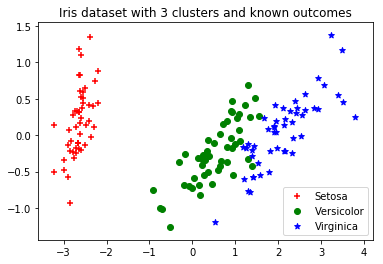

In [59]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if iris.target[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif iris.target[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif iris.target[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')

pl.legend([c1, c2, c3], ['Setosa', 'Versicolor', 'Virginica'])
pl.title('Iris dataset with 3 clusters and known outcomes')
pl.show()

Trực quan hóa dữ liệu tham chiếu

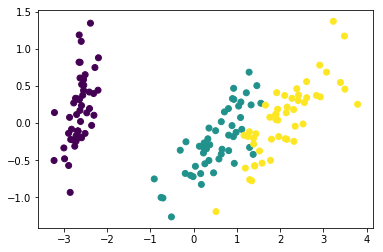

In [60]:
pl.figure('Reference Plot')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=iris.target)
pl.show()

Dữ liệu trước khi phân cụm

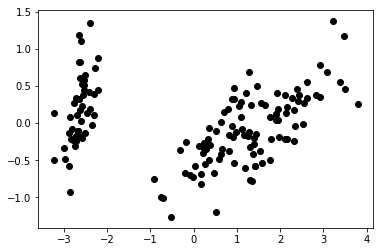

In [61]:
pl.scatter(pca_2d[:,0],pca_2d[:,1],c='black')
pl.show()

Tiến hành phân cụm với K-means

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=111, tol=0.0001, verbose=0)

Trực quan hóa kết quả

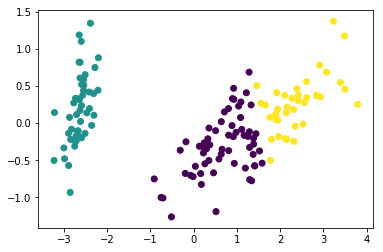

In [63]:
pl.figure('K-means with 3 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
pl.show()